In [1]:
library(extrafont)
loadfonts()

library(ggplot2)
library(gss)

Registering fonts with R


# Pan, pad, pass, pat

![](http://content6.flixster.com/photo/11/38/44/11384492_gal.jpg)

In [2]:
a.tongue <- read.csv("NJ0205a_Tongue_Contour.csv")
c.tongue <- read.csv("NJ0205c_Tongue_Contour.csv")

summary(a.tongue)

    Subject       repetition    word         token          Frame   
 NJ0205a:1320   B      :132   pad :330   B_pad  :  33   Min.   : 1  
                C      :132   pan :330   B_pan  :  33   1st Qu.: 9  
                D      :132   pass:330   B_pass :  33   Median :17  
                E      :132   pat :330   B_pat  :  33   Mean   :17  
                F      :132              C_pad  :  33   3rd Qu.:25  
                G      :132              C_pan  :  33   Max.   :33  
                (Other):528              (Other):1122               
       X               Y        
 Min.   :231.0   Min.   :151.0  
 1st Qu.:334.0   1st Qu.:180.0  
 Median :417.5   Median :196.0  
 Mean   :416.4   Mean   :200.7  
 3rd Qu.:501.0   3rd Qu.:221.0  
 Max.   :595.0   Max.   :277.0  
                                

In [3]:
a.tongue$word <- relevel(a.tongue$word, "pan")
c.tongue$word <- relevel(c.tongue$word, "pan")

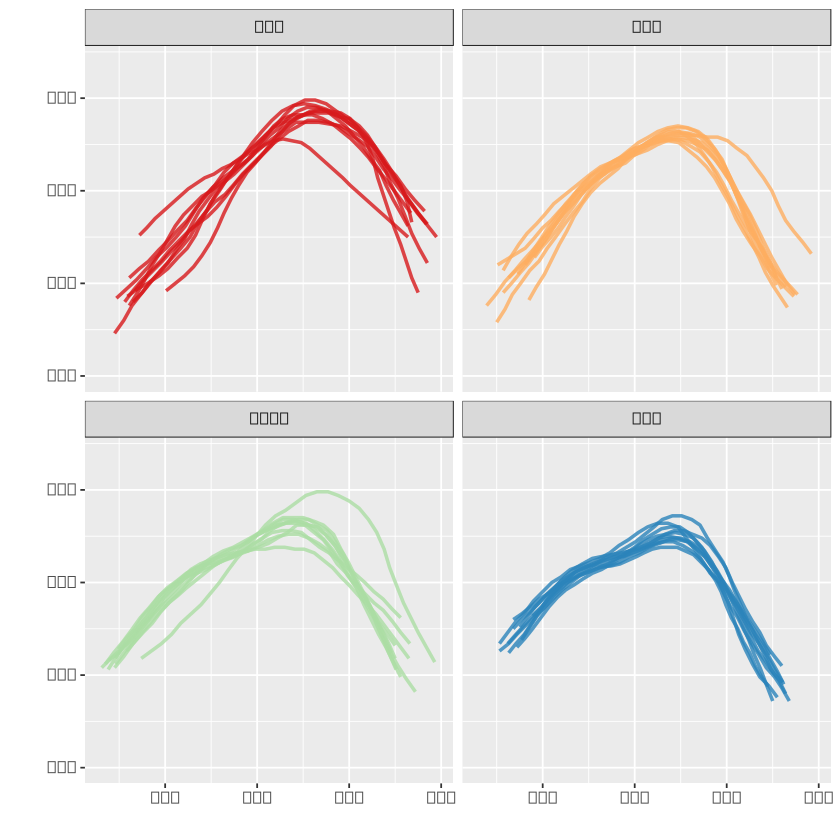

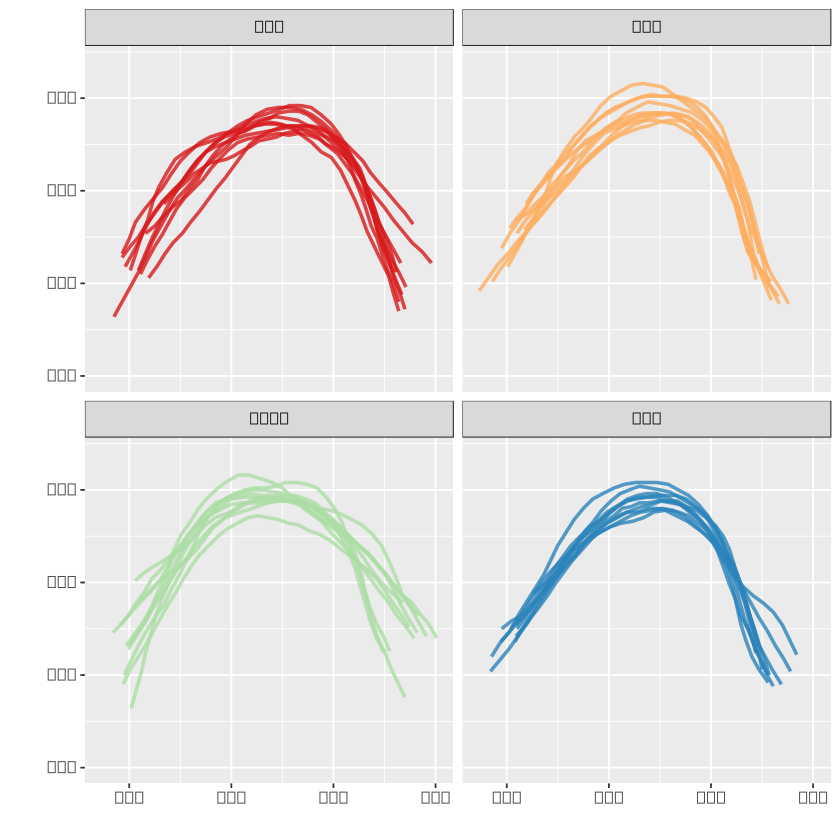

In [4]:
A.tokens <- ggplot(a.tongue, aes(x=X, y=Y, group = token, colour=word))
A.tokens + geom_line(aes(y=Y), alpha = 0.8, size=1) + scale_y_reverse(limits = c(300,130)) + ylab("") + xlab("") + scale_color_brewer(type = "qual", palette = "Spectral") +facet_wrap(~ word)  + theme(legend.position="none") + theme(strip.text.x=element_text(size=30))

C.tokens <- ggplot(c.tongue, aes(x=X, y=Y, group = token, colour=word))
C.tokens + geom_line(aes(y=Y), alpha = 0.8, size=1) + scale_y_reverse(limits = c(300,130))  + ylab("") + xlab("")+ theme(strip.text.x=element_text(size=30))+ theme(legend.position="none") + scale_color_brewer(type = "qual", palette = "Spectral") +facet_wrap(~ word)


In [5]:
tongue.model.A <- ssanova(Y ~ word + X + word:X,data=a.tongue)
tongue.model.C <- ssanova(Y ~ word + X + word:X, data=c.tongue)

summary(tongue.model.A)


Call:
ssanova(formula = Y ~ word + X + word:X, data = a.tongue)

Estimate of error standard deviation: 7,948167 

Residuals:
        Min          1Q      Median          3Q         Max 
-42,0286631  -3,6355344  -0,0486824   3,5468731  35,0980806 
Residual sum of squares: 81586,68
R square: 0,9031775

Penalty associated with the fit: 3927,607


In [6]:
grid.A <- expand.grid(X = seq(231, 595, length = 33), word = c("pan", "pad", "pass", "pat")) 
head(grid.A)


X,word
"231,000",pan
"242,375",pan
"253,750",pan
"265,125",pan
"276,500",pan
"287,875",pan


In [7]:
grid.A$Fit <- predict(tongue.model.A, newdata = grid.A, se = T)$fit 
head(grid.A)

X,word,Fit
"231,000",pan,"270,5302"
"242,375",pan,"264,8161"
"253,750",pan,"259,1180"
"265,125",pan,"253,3225"
"276,500",pan,"247,2566"
"287,875",pan,"240,8952"


In [8]:
grid.A$SE <- predict(tongue.model.A, newdata = grid.A, se = T)$se.fit 
head(grid.A)


X,word,Fit,SE
"231,000",pan,"270,5302","3,453510"
"242,375",pan,"264,8161","2,518728"
"253,750",pan,"259,1180","1,874622"
"265,125",pan,"253,3225","1,479622"
"276,500",pan,"247,2566","1,216419"
"287,875",pan,"240,8952","1,168800"


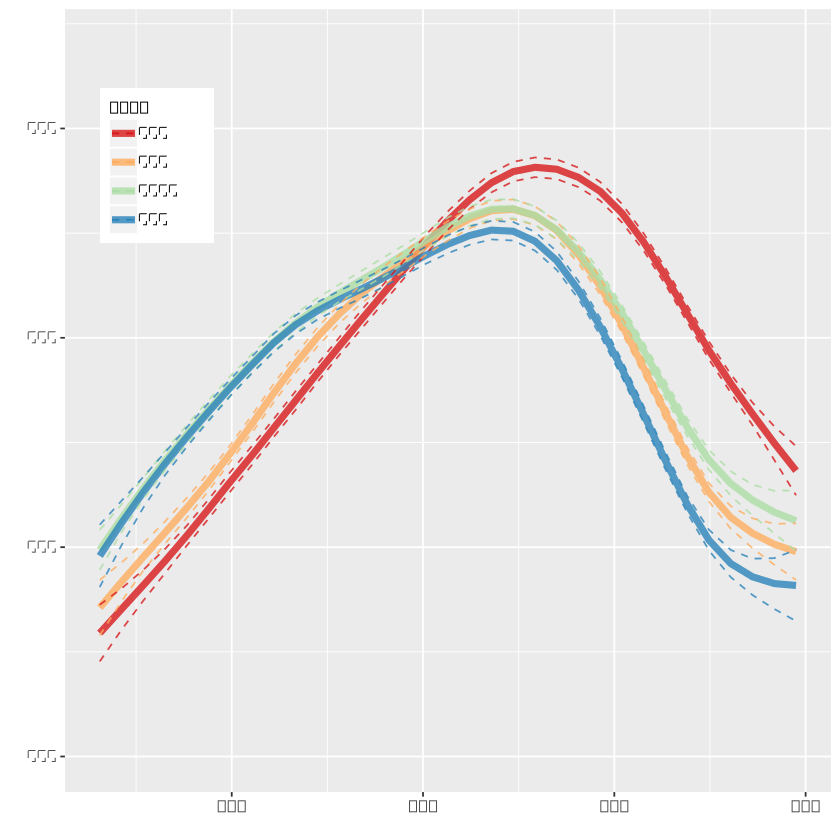

In [9]:
comparison.A <- ggplot(grid.A, aes(x = X, colour = word))
comparison.A + geom_line(aes(y = Fit), size=2, alpha = .8) + scale_y_reverse(limits = c(300,130)) + scale_color_brewer(type = "qual", palette = "Spectral") + ylab("") + xlab("") + geom_line(aes(y = Fit+(1.96*SE)), lty=2, alpha=0.8) + geom_line(aes(y = Fit-(1.96*SE)), lty=2, alpha=0.8) +  theme(legend.position=c(0.12, 0.8)) + theme(legend.text=element_text(size=20)) + theme(legend.title=element_text(size=0))


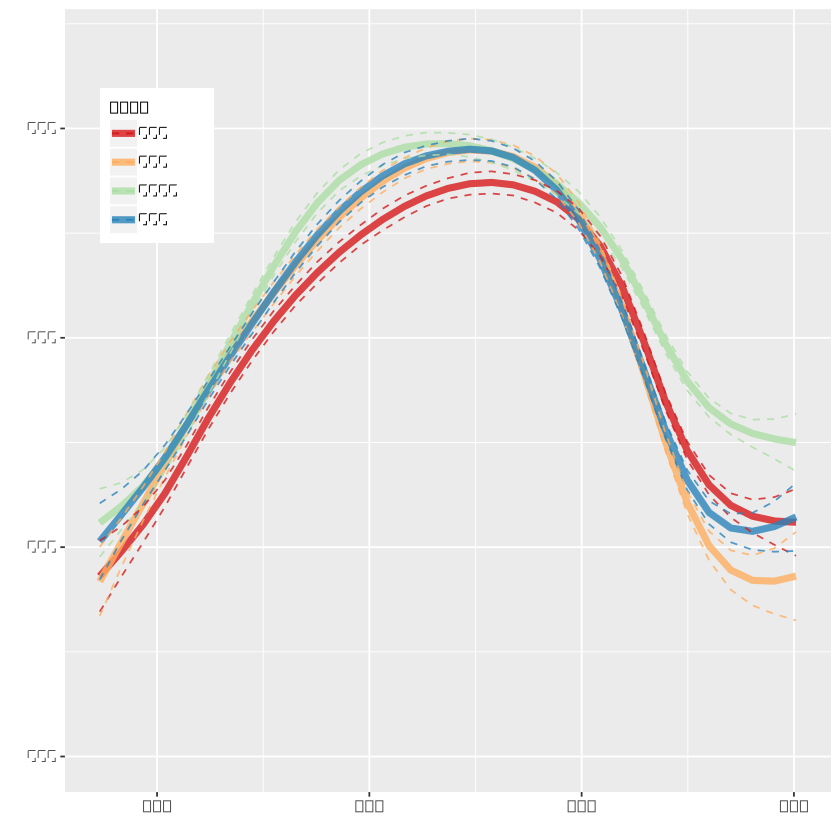

In [11]:
grid.C <- expand.grid(X = seq(273, 601, length = 33), word = c("pan", "pad", "pass", "pat")) 
grid.C$Fit <- predict(tongue.model.C, newdata = grid.C, se = T)$fit 
grid.C$SE <- predict(tongue.model.C, newdata = grid.C, se = T)$se.fit


comparison.C <- ggplot(grid.C, aes(x = X, colour = word))
comparison.C + geom_line(aes(y = Fit), size=2, alpha = .8) + scale_y_reverse(limits = c(300,130)) + scale_color_brewer(type = "qual", palette = "Spectral") + ylab("") + xlab("") + geom_line(aes(y = Fit+(1.96*SE)), lty=2, alpha=0.8) + geom_line(aes(y = Fit-(1.96*SE)), lty=2, alpha=0.8) +  theme(legend.position=c(0.12, 0.8)) + theme(legend.text=element_text(size=20)) + theme(legend.title=element_text(size=0))


In [1]:
library(dplyr)
library(ggplot2)
library(extrafont)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registering fonts with R


In [2]:
font_import(paths = "~/.local/share/fonts/",prompt = F)

Scanning ttf files in ~/.local/share/fonts/ ...
Extracting .afm files from .ttf files...


ERROR: Error in data.frame(fontfile = ttfiles, FontName = "", stringsAsFactors = FALSE): arguments imply differing number of rows: 0, 1


Warning message:
“Removed 37 rows containing missing values (geom_point).”

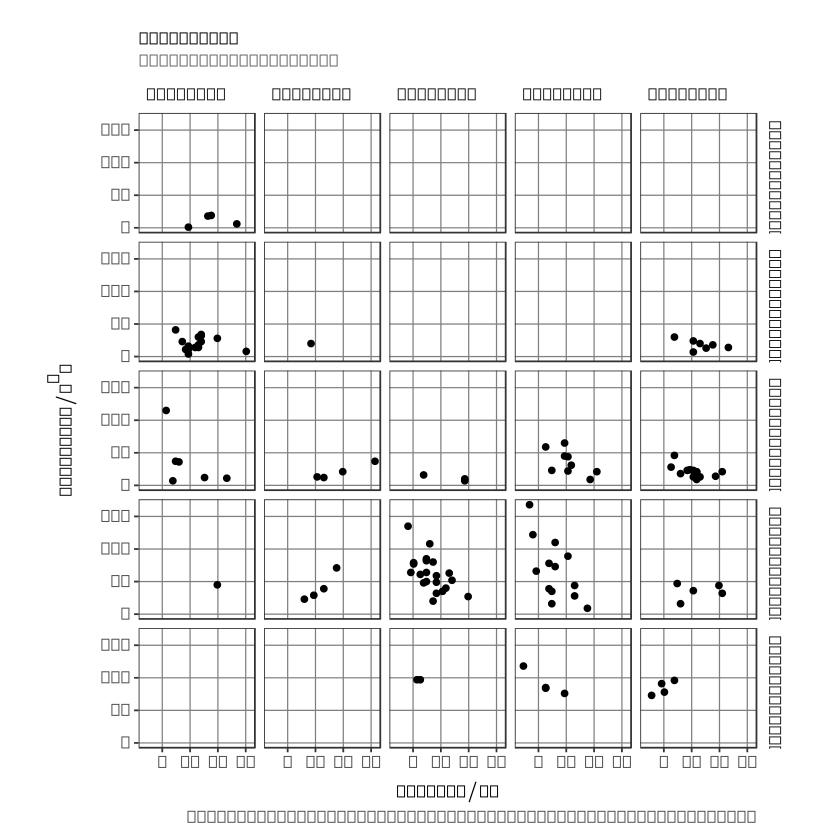

In [4]:
p <- ggplot(airquality %>% mutate(Temp=cut(Temp,breaks = c((5:10)*10))),
            aes(x=Wind,y=Ozone)) + geom_point() +
  facet_grid(Temp~Month, labeller = label_both) +
  theme_bw()+
  theme(
    text = element_text(),
    strip.background = element_blank(),
    strip.text = element_text(hjust = 0),
    panel.grid.major = element_line(colour="grey50",size=0.35),
    panel.grid.minor = element_blank(),
    plot.margin=unit(c(0,1,0,1),"cm"),
    legend.position="top",
    plot.caption=element_text(hjust=1,size=9,colour="grey30"),
    plot.subtitle=element_text(face="italic",size=12,colour="grey40"),
    plot.title=element_text(size=18,face="bold")) +
  labs(title="\nAn example",
       subtitle="using font Decima WE",
       caption="Notes: probably compliant with the new logo font ARPA-FVG\n",
       x=expression("wind"~(m/s)),
       y=expression("ozone"~(mu*g/m^3)))
  
  p